**Data Loading and Preprocessing**


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [124]:
data=pd.read_csv(r'/content/train (1).csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Display basic information about the dataset, such as column names, data types, and missing values.


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Check for missing values in each column

In [126]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Check for duplicate rows in the dataset


In [127]:
data.duplicated().sum()

0

In [128]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Correlation matrix to understand relationships between features

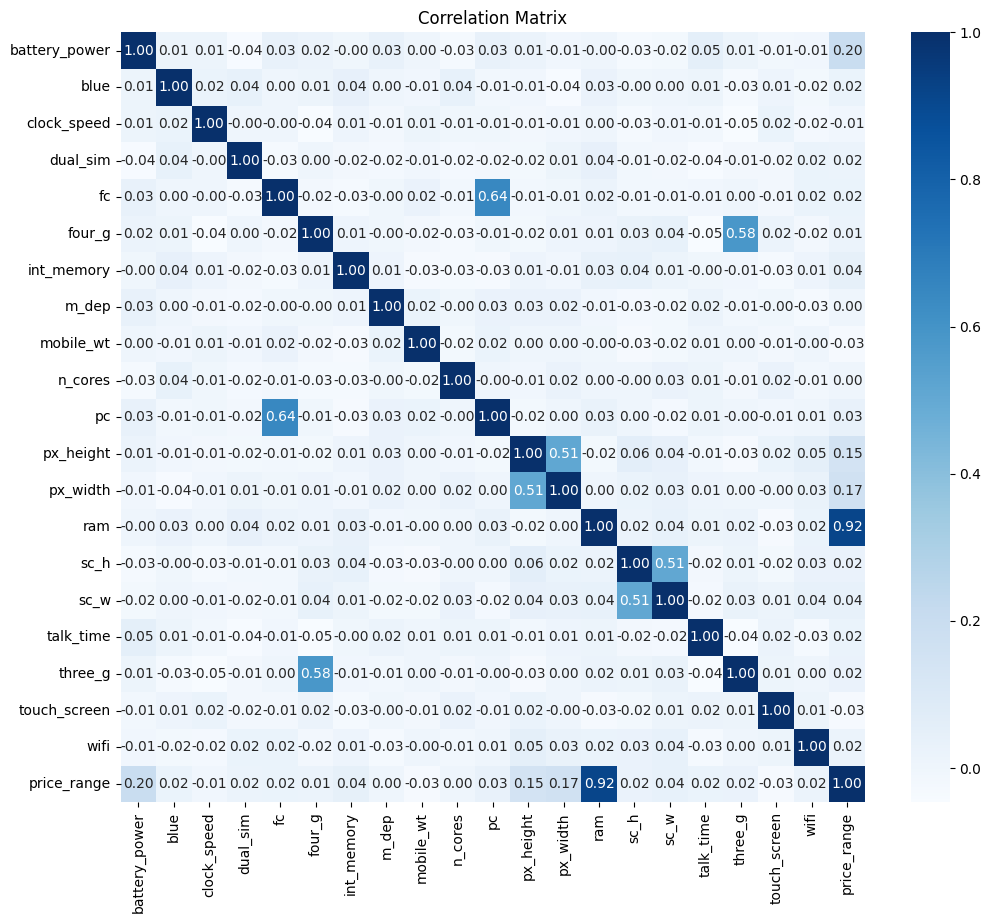

In [129]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

as we can conclude from correlation matrix that there's a lot of features that don't have as much as importance as others so we need to select the more correlated features


In [130]:
x=data.iloc[: , :-1]
y=data['price_range']

In [131]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [132]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


feature selection


There are a lot of features but which matters the most?


In [133]:
threshold=0.01
high=correlation_matrix.index[abs(correlation_matrix['price_range'])>threshold].to_list()
high.remove('price_range')
xSelected=data[high]
xSelected

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,0,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,1,0
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,106,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,1,0,0,39,187,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,1,1,1,36,108,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0,4,1,46,145,5,336,670,869,18,10,19,1,1,1


**KNN Algorithm**

Split the data into training and testing


In [134]:
X_train,X_test,y_train,y_test=train_test_split(xSelected,y,test_size=0.2,random_state=42)

Find the optimal k value using cross-validation


In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 20)
metrics = ['euclidean', 'manhattan']
results = []

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

        # Store results:
        results.append({
            'k': k,
            'metric': metric,
            'mean_accuracy': np.mean(cv_scores),
        })


results_df = pd.DataFrame(results)
print(results_df)


     k     metric  mean_accuracy
0    1  euclidean       0.885000
1    1  manhattan       0.890625
2    2  euclidean       0.891875
3    2  manhattan       0.891875
4    3  euclidean       0.908125
5    3  manhattan       0.904375
6    4  euclidean       0.902500
7    4  manhattan       0.901875
8    5  euclidean       0.918125
9    5  manhattan       0.915000
10   6  euclidean       0.916875
11   6  manhattan       0.913750
12   7  euclidean       0.921875
13   7  manhattan       0.920000
14   8  euclidean       0.918125
15   8  manhattan       0.909375
16   9  euclidean       0.923750
17   9  manhattan       0.921875
18  10  euclidean       0.922500
19  10  manhattan       0.916875
20  11  euclidean       0.928750
21  11  manhattan       0.921250
22  12  euclidean       0.927500
23  12  manhattan       0.913750
24  13  euclidean       0.924375
25  13  manhattan       0.921875
26  14  euclidean       0.925625
27  14  manhattan       0.920000
28  15  euclidean       0.917500
29  15  ma

In [136]:
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]
best_k = best_result['k']
best_metric = best_result['metric']
print(f"Best k: {best_k}, Best metric: {best_metric}")

Best k: 11, Best metric: euclidean


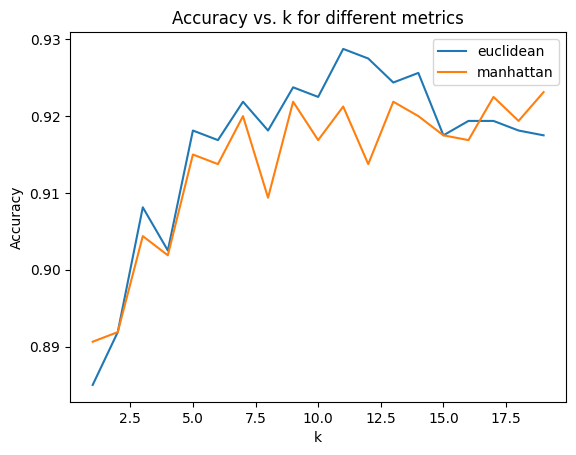

In [137]:
for metric in results_df['metric'].unique():
    metric_df = results_df[results_df['metric'] == metric]
    plt.plot(metric_df['k'], metric_df['mean_accuracy'], label=metric)

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k for different metrics")
plt.legend()
plt.show()

Further optimize k using GridSearchCV.


In [138]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_neighbors':range(1 ,20)}
grid_knn =GridSearchCV(estimator=knn ,
                     param_grid=parameters ,
                     scoring ="accuracy" ,
                     cv =5 ,
                     verbose=1 ,
                     n_jobs=-1)


In [139]:
grid_knn.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


<ipython-input-139-c89966de0455>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_knn.fit(X_train,y_train.ravel())


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=19),
             n_jobs=-1, param_grid={'n_neighbors': range(1, 20)},
             scoring='accuracy', verbose=1)

In [140]:
grid_knn.best_params_

{'n_neighbors': 19}

Train the KNN classifier with the optimal k which is 11


In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Evaluate the model's accuracy on the test set


In [142]:
knn.score(X_test,y_test)

0.95

Classification report to see precision, recall and F1 score

In [143]:
predknn=knn.predict(X_test)
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.96      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



-Accuracy: The overall accuracy of the model is 95%, which is quite high. This means that the model correctly predicted the class for 95% of the instances in the test set.

-Macro Average and Weighted Average: Both macro average and weighted average for precision, recall, and F1-score are around 95%, indicating a good balance in performance across all classes.
Class-wise Performance

Class 0: Achieves high precision (0.97), recall (0.98), and F1-score (0.98), indicating excellent performance in identifying instances of this class.

Class 1: Shows good performance with precision (0.92), recall (0.96), and F1-score (0.94).
Class 2: Has slightly lower precision (0.91) and recall (0.93) compared to the other classes, but still maintains a decent F1-score (0.92).

Class 3: Achieves perfect precision (1.00), meaning it correctly identifies all instances of this class. However, it has a lower recall (0.93), indicating some instances of this class were missed. The F1-score (0.96) balances precision and recall.

In [144]:
train_accuracyknn = knn.score(X_train, y_train)
test_accuracyknn = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracyknn*100}%")
print(f"Testing Accuracy: {test_accuracyknn*100}%")

Training Accuracy: 95.1875%
Testing Accuracy: 95.0%


Confusion matrix to visualize knn performance

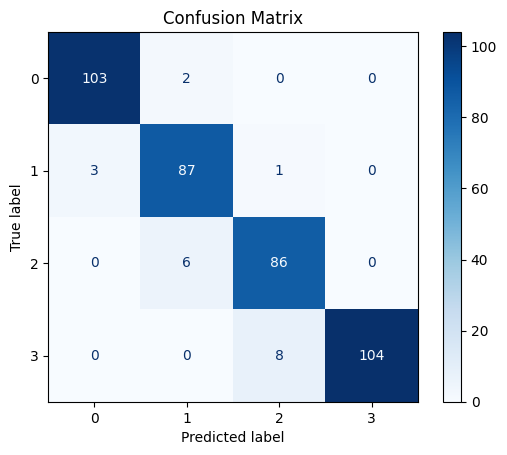

In [145]:
cm=confusion_matrix(y_test,predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

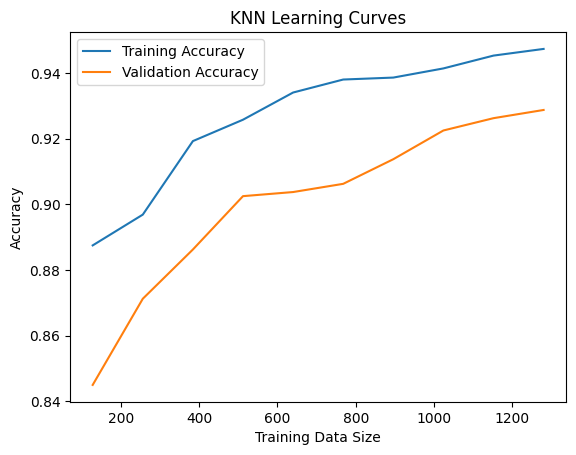

In [146]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=11), X_train, y_train, cv=5,
    scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Accuracy")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.title("KNN Learning Curves")
plt.legend()
plt.show()

Naive bayes


Gaussian Naive Bayes classifier
In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution

Multinomial Naive Bayes
Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.

Bernoulli Naive Bayes
In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document).

*So the most applicable on our Mobile data is Gaussian Naive bayes
but I am gonna implement them all to make sure too*

In [147]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
GNB=GaussianNB()
BNB=BernoulliNB()
MNB=MultinomialNB()

In [148]:
GNB.fit(X_train,y_train)

GaussianNB()

In [149]:
BNB.fit(X_train,y_train)


BernoulliNB()

In [150]:
MNB.fit(X_train,y_train)

MultinomialNB()

In [151]:
print("GaussianNB accuracy:", GNB.score(X_test,y_test))
print("BernoulliNB accuracy:", BNB.score(X_test,y_test))
print("MultinomialNB accuracy:", MNB.score(X_test,y_test))

GaussianNB accuracy: 0.8
BernoulliNB accuracy: 0.255
MultinomialNB accuracy: 0.545


Gaussian Naive Bayes is the most common and most helpful one in our case so I am gonna use it to predict

In [152]:
from sklearn import metrics

prednb=GNB.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, prednb)*100)
print(classification_report(y_test,prednb))

Gaussian Naive Bayes model accuracy(in %): 80.0
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.76      0.68      0.72        91
           2       0.63      0.77      0.70        92
           3       0.89      0.82      0.86       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.80       400
weighted avg       0.81      0.80      0.80       400



Accuracy: 80% - This is the overall accuracy of the model, meaning it correctly predicted the price range for 80% of the mobile phones in the test set.
Macro Average: 80% (Precision, Recall, F1-score) - This is the average performance across all four price range classes, giving equal weight to each class. It's a good indicator of overall performance when class distribution is imbalanced.

Weighted Average: 80% (Precision, Recall, F1-score) - This average is weighted by the number of instances in each class. Since your classes are relatively balanced, the weighted average is similar to the macro average.
Class-wise Performance

The report provides precision, recall, and F1-score for each price range class (0, 1, 2, 3)

Precision: Out of all the phones predicted to belong to a specific price range, what proportion was actually correct?
Recall: Out of all the phones that actually belong to a specific price range, what proportion did the model correctly identify?
F1-score: The harmonic mean of precision and recall, providing a balanced measure of both.

Class 0 (Lowest Price Range):
Precision: 92% - When the model predicts a phone belongs to this class, it's correct 92% of the time.
Recall: 90% - The model correctly identifies 90% of the phones that actually belong to this class.
F1-score: 91% - A good balance between precision and recall.

Class 1:
Precision: 76%
Recall: 68%
F1-score: 72% - The model's performance is a bit weaker for this class, especially in terms of recall (meaning it misses identifying some phones in this price range).

Class 2:
Precision: 63% - Lower precision indicates more false positives for this class.
Recall: 77% - Relatively good recall, meaning it captures most phones belonging to this class.
F1-score: 70% - An okay balance between precision and recall.

Class 3 (Highest Price Range):
Precision: 89%
Recall: 82%
F1-score: 86% - Good performance for this class, although it could be improved slightly in terms of recall.

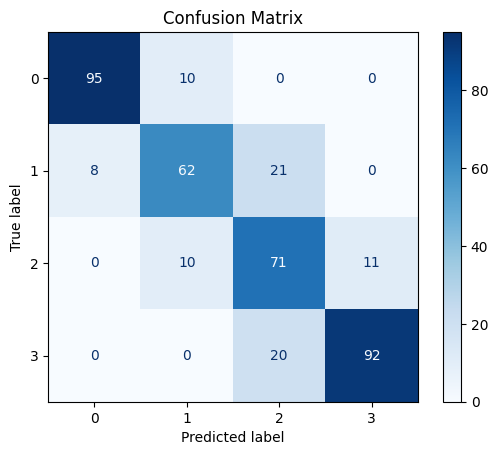

In [153]:
cm=confusion_matrix(y_test,prednb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()